## 逻辑回归

In [28]:
# 三大件
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='ticks',context='poster')
# sns.set(style='ticks',context='poster',font_scale=0.5)

In [7]:
filepath = '/Users/joey/Documents/PycharmProjects/mywork/regressionalgorithm/LogiReg_data.txt'
pdData = pd.read_csv(filepath,header=None,names=['Exam 1','Exam 2','Admitted'])
print(pdData.shape)
pdData.head()

(100, 3)


,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [9]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]

Text(0, 0.5, 'Exam 2 Score')

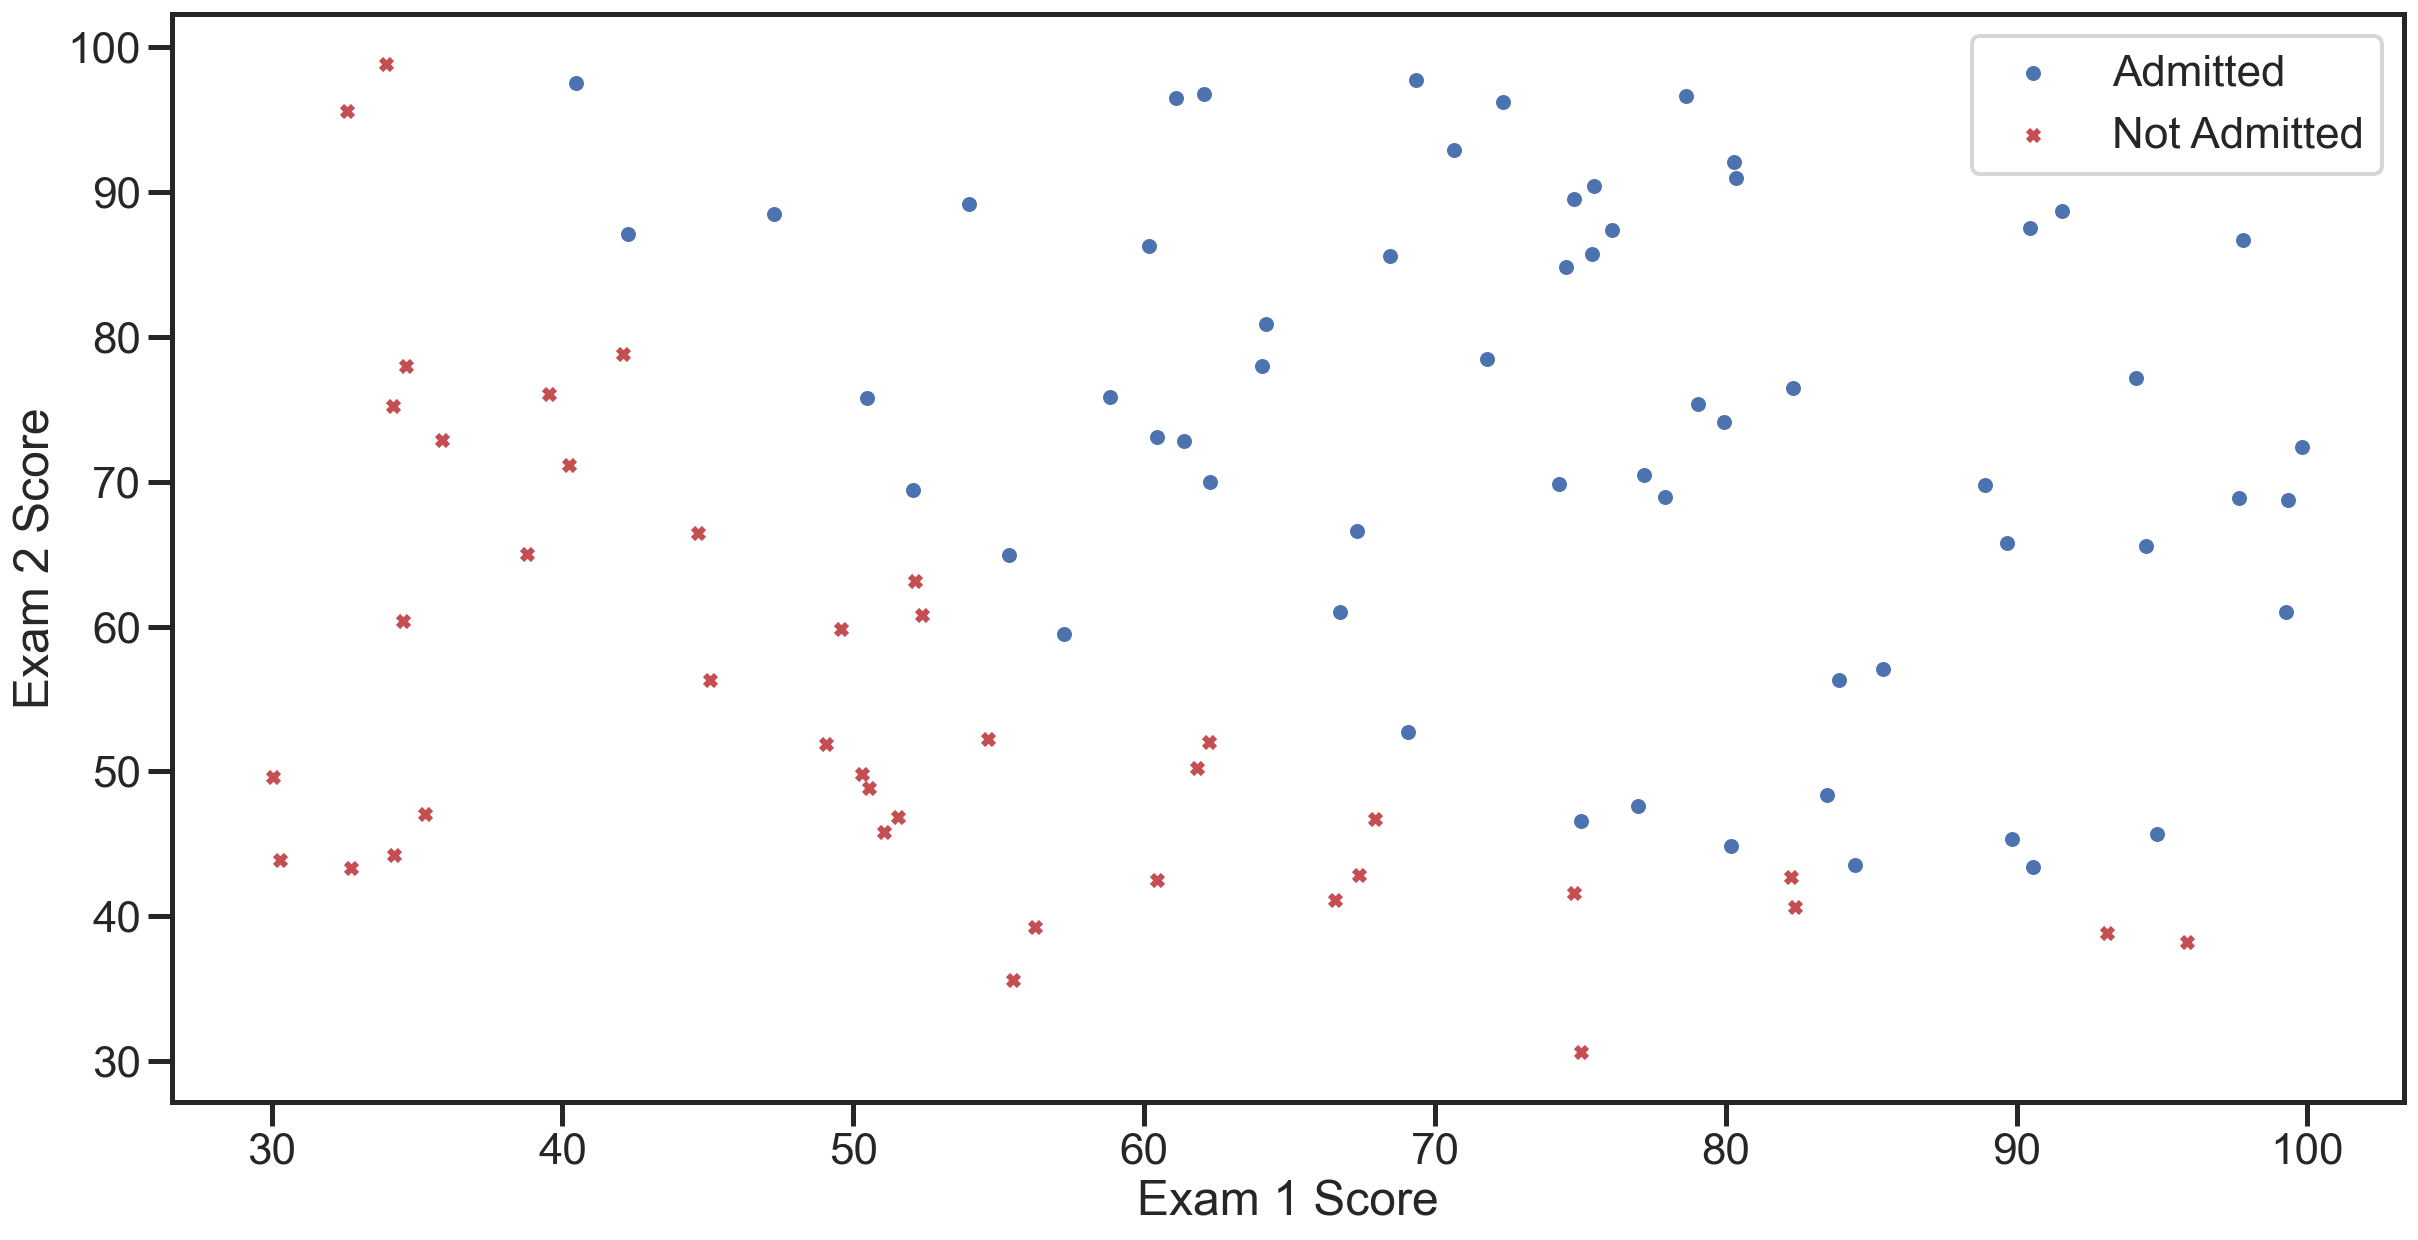

In [30]:
# 最后得出的结果应该是像图里的一条收敛的分界线
fig, ax = plt.subplots(figsize=(20,10))
# ax[0].scatter(positive['Exam 1'],positive['Exam 2'],s=30,c='b',marker='o',label='Admitted')
# ax[1].scatter(negative['Exam 1'],negative['Exam 2'])
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=30,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

## 建模流程
目标：建立分类器$\theta_0\theta_1\theta_2$
设定阈值，根据阈值判断录取结果

要完成的模块：
* sigmoid 映射到概率的函数
* model 返回预测结果值
* cost 根据参数计算损失
* gradient 计算每个参数的梯度方向
* descent 进行参数更新
* accuracy 计算精度

### sigmoid
$
g(z) = \frac{1}{1+e^{-z}}
$

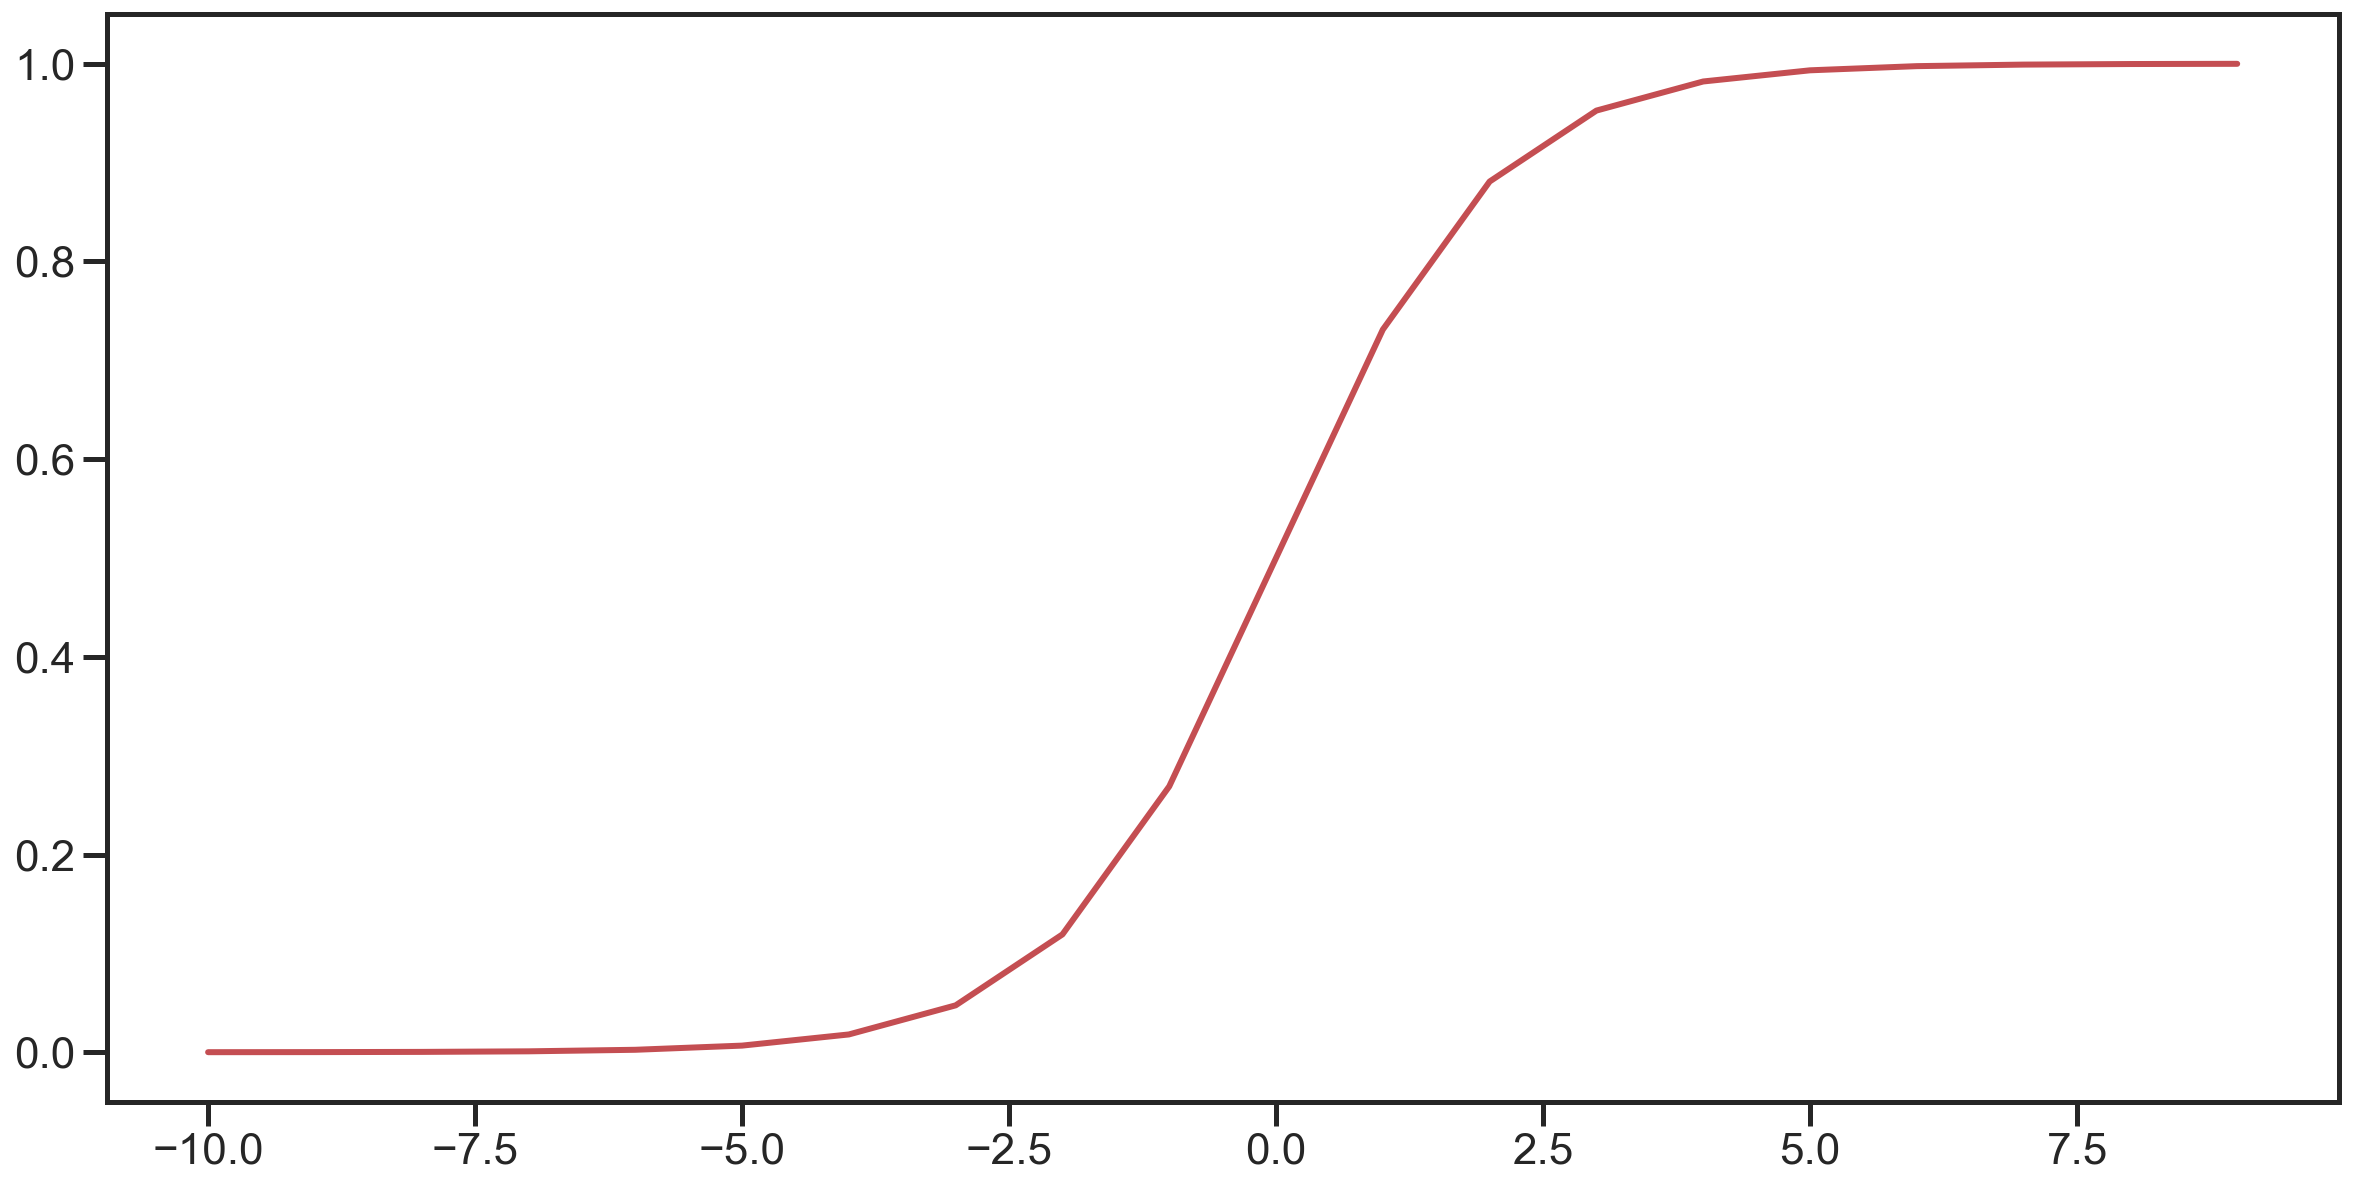

In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 测试
fig, ax = plt.subplots(figsize=(20,10))
nums = np.arange(-10,10,step=1)
plt.plot(nums, sigmoid(nums),'r')

### digmoid
* $g:\mathbb{R} \to [0,1]$
* $g(0)=0.5$
* $g(- \infty)=0$
* $g(+ \infty)=1$



In [79]:
# 预测函数
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))


$
\begin{array}{ccc}
\begin{pmatrix}\theta_{0} & \theta_{1} & \theta_{2}\end{pmatrix} & \times & \begin{pmatrix}1\\\
x_{1}\\\
x_{2}
\end{pmatrix}\end{array}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}
$

In [76]:
del pdData['Ones']
pdData.insert(0,'Ones',1)
orig_data = pdData.values # 转为矩阵，as_matrix失效。np.matrix(pdData)
cols = orig_data.shape[1]
theta = np.zeros([1,3]) # 初始值为设为0，后期求梯度得出真正的theta
X = orig_data[:,0:cols-1]
y = orig_data[:,cols-1:cols]
X[:5],y[:5]

(array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644]]),
 array([[0.],
        [0.],
        [0.],
        [1.],
        [1.]]))

In [77]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

### 损失函数(对数似然函数)
##### 估量模型的预测值f(x)与真实值Y的不一致程度

将对数似然函数去负号
$
D(h_\theta(x), y) = -y\log(h_\theta(x)) - (1-y)\log(1-h_\theta(x))
$
求平均损失
$
J(\theta)=\frac{1}{n}\sum_{i=1}^{n} D(h_\theta(x_i), y_i)
$

In [80]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X,theta)))
    right = np.multiply(1-y,np.log(1-model(X,theta)))
    return np.sum(left-right)/len(X)
cost(X,y,theta) # 默认0的情况下损失值

0.6931471805599453

array([[0., 0., 0.]])